In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
crime_csv = pd.read_csv("crime_data_clean.csv")
crime_df = pd.DataFrame(crime_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
crime_df = crime_df[["county","crime_rate_per_100000"]]
crime_df = crime_df.rename(columns={"crime_rate_per_100000": "crime_rate_per_100,000"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [4]:
crime_df.head()

,county,"crime_rate_per_100,000"
0,"St. Louis, MO",1791.995377
1,"Crittenden, AR",1754.914968
2,"Alexander, IL",1664.700485
3,"Kenedy, TX",1456.310680
4,"De Soto, LA",1447.402430


In [5]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [6]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Santa Cruz, CA",59.7
1,"Dundy, NE",68.0
2,"St. Croix, WI",75.7
3,"Stewart, TN",70.9
4,"Stoddard, MO",69.3


In [7]:
crime_analysis = sample_home_ownership.merge(crime_df, on="county")
crime_analysis.head()

,county,HOR,"crime_rate_per_100,000"
0,"Santa Cruz, CA",59.7,386.387003
1,"Dundy, NE",68.0,0.000000
2,"St. Croix, WI",75.7,68.660538
3,"Stewart, TN",70.9,306.840293
4,"Stoddard, MO",69.3,198.119543


In [8]:
len(crime_analysis)

620


## Analysis

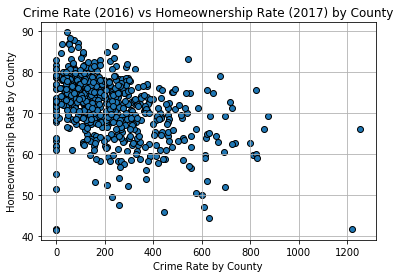

In [9]:
plt.scatter(crime_analysis["crime_rate_per_100,000"], crime_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Crime Rate (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Crime Rate by County")
plt.grid(True)
plt.savefig('Pictures/Crime_rate_scatter.png')

In [10]:
x = crime_analysis["crime_rate_per_100,000"]
y = crime_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                              768.1
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                   1.52e-110
Time:                        10:06:32   Log-Likelihood:                         -3280.4
No. Observations:                 620   AIC:                                      6563.
Df Residuals:                     619   BIC:                                      6567.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
crime_rate_per_100,000     0.1870      0.007     27.714      0.000       0.174       0.200
==============================================================================
Omnibus:                      183.914   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.624
Skew:                          -1.468   Prob(JB):                    2.17e-111
Kurtosis:                       6.333   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

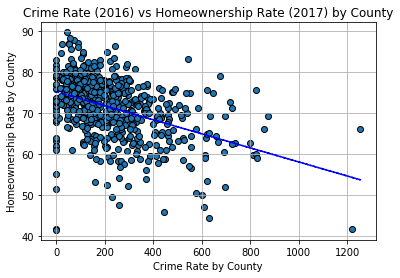

In [12]:
plt.scatter(crime_analysis["crime_rate_per_100,000"], crime_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Crime Rate (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Crime Rate by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Crime_rate_regression.png')